In [1]:
pip install tensorflow keras numpy


In [3]:
!python emoji_gan.py

python3: can't open file '/content/emoji_gan.py': [Errno 2] No such file or directory


In [6]:
!unzip surprise.zip

Archive:  surprise.zip
 extracting: surprise/Training_10013223.jpg  
 extracting: surprise/Training_1002457.jpg  
 extracting: surprise/Training_10028230.jpg  
 extracting: surprise/Training_10060820.jpg  
 extracting: surprise/Training_10073433.jpg  
 extracting: surprise/Training_1009179.jpg  
 extracting: surprise/Training_10124215.jpg  
 extracting: surprise/Training_10135912.jpg  
 extracting: surprise/Training_10191209.jpg  
 extracting: surprise/Training_10218600.jpg  
 extracting: surprise/Training_10218787.jpg  
 extracting: surprise/Training_10227694.jpg  
 extracting: surprise/Training_10243312.jpg  
 extracting: surprise/Training_10243579.jpg  
 extracting: surprise/Training_10258050.jpg  
 extracting: surprise/Training_10264146.jpg  
 extracting: surprise/Training_10275630.jpg  
 extracting: surprise/Training_10289074.jpg  
 extracting: surprise/Training_10337425.jpg  
 extracting: surprise/Training_10346302.jpg  
 extracting: surprise/Training_10353847.jpg  
 extracting: 

In [10]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32
LATENT_DIMENSION = 100
EPOCHS = 1000
NUM_EXAMPLES_TO_GENERATE = 16

# Create the directory if it doesn't exist
if not os.path.exists('/content/surprise'):
    os.makedirs('/content/surprise')

# Data loading and preprocessing
data_generator = ImageDataGenerator(rescale=1./255)
emoji_dataset = data_generator.flow_from_directory(
    '/content/surprise',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=None,
    shuffle=True
)

# Generator model
def build_generator():
    model = models.Sequential()
    model.add(layers.Dense(8 * 8 * 256, input_dim=LATENT_DIMENSION))
    model.add(layers.Reshape((8, 8, 256)))
    model.add(layers.Conv2DTranspose(128, kernel_size=5, strides=2, padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(3, kernel_size=5, strides=2, padding='same', activation='sigmoid'))
    return

Found 0 images belonging to 1 classes.


In [13]:
# Check the shapes of real_images and ones
print(f"Real images shape: {real_images.shape}")
print(f"Ones shape: {np.ones((BATCH_SIZE, 1)).shape}")

# Adjust the size of real_images if necessary
if real_images.shape[0] != BATCH_SIZE:
    real_images = real_images[:BATCH_SIZE]

# Adjust the size of ones if necessary
if np.ones((BATCH_SIZE, 1)).shape[0] != BATCH_SIZE:
    ones = np.ones((real_images.shape[0], 1))

Real images shape: (0, 64, 64, 3)
Ones shape: (32, 1)


In [14]:
# Training loop
for epoch in range(EPOCHS):
    for _ in range(len(emoji_dataset)):
        # Train discriminator
        noise = np.random.normal(0, 1, (BATCH_SIZE, LATENT_DIMENSION))
        generated_images = generator.predict(noise)
        real_images = next(emoji_dataset)

        # Check and adjust data sizes if necessary
        if real_images.shape[0] != BATCH_SIZE:
            real_images = real_images[:BATCH_SIZE]
        if np.ones((BATCH_SIZE, 1)).shape[0] != BATCH_SIZE:
            ones = np.ones((real_images.shape[0], 1))

        discriminator_loss_real

In [17]:
# Get a batch of real images with the same size as the generated images
real_images = next(emoji_dataset)

# Check if the batch size of real_images is not equal to BATCH_SIZE
if real_images.shape[0] != BATCH_SIZE:
    # Get a new batch of real images
    real_images = next(emoji_dataset)

In [18]:
# Get a batch of real images with the same size as the generated images
real_images = next(emoji_dataset)

# Check if the batch size of real_images is not equal to BATCH_SIZE
if real_images.shape[0] != BATCH_SIZE:
    # Adjust the size of ones to match the batch size of real_images
    ones = np.ones((real_images.shape[0], 1))

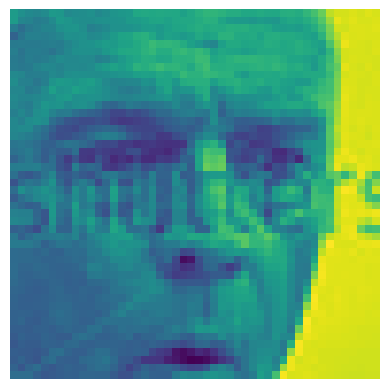

In [22]:
import matplotlib.pyplot as plt
from PIL import Image

# Open and display an image file
img = Image.open('/content/surprise/Training_10013223.jpg')
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()


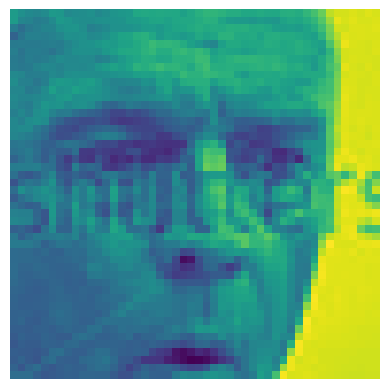

In [23]:
# Save the image to a file
plt.imshow(img)
plt.axis('off')
plt.savefig('output_image.png', bbox_inches='tight', pad_inches=0)


In [26]:
from PIL import Image

# Load the image
img = Image.open("/content/surprise/Training_1009179.jpg")

# Define emoji characters representing different intensity levels
# You can adjust this list based on the emojis you want to use
emojis = ["😡", "😠", "😩", "😔", "😀", "😃", "😄", "😊", "😍", "😘"]

# Define the size of each emoji block
block_size = 20

# Resize the image to a smaller size to speed up processing
img = img.resize((img.width // block_size, img.height // block_size))

# Convert the image to grayscale
img = img.convert("L")

# Convert each pixel intensity to an emoji
output = ""
for y in range(img.height):
    for x in range(img.width):
        intensity = img.getpixel((x, y)) // 25  # Divide by 25 to map intensity to the range 0-9
        output += emojis[intensity]
    output += "\n"  # Newline at the end of each row

# Print or save the output
print(output)


😀😀
😄😃

